# Part 3: Data Analysis (40%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

from datetime import datetime 

import re
import nltk

## Step 1: Crawl a real-world dataset

In [44]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(
    auth_manager=SpotifyClientCredentials(
        client_id='262f1d55233c40938cb157f5f2a45beb',
        client_secret='5ec6a7c82c1e402294f64217d662f58f'
    )
)

In [92]:
mbdtf = 'spotify:album:20r762YmB5HeofjMCiPMLv'

In [51]:
new_releases = sp.new_releases(country = 'GB', limit=2)

In [50]:
nr_album_names = []
nr_album_uri = []

for i in new_releases['albums']['items']:
    nr_album_uri.append(i['uri'])
    nr_album_names.append(i['name'])

print('New Release Album Names:', nr_album_names)
print('New Release Album URIs:', nr_album_uri)

New Release Album Names: ['i wonder if you wonder', 'white light']
New Release Album URIs: ['spotify:album:3Mz1DFcunKLU3ki7iVX26t', 'spotify:album:3Xzs5FHxd6FFwkq0nTF1l3']


In [94]:
def get_songs(uri):
    album = {}
    album['name'] = []
    album['id'] = []
    album['uri'] = []
    album['duration'] = []

    album_tracks = sp.album_tracks(uri)['items']

    for i in album_tracks:
        album['name'].append(i['name'])
        album['id'].append(i['id'])
        album['uri'].append(i['uri'])
        album['duration'].append(i['duration_ms'])
    return album

In [106]:
nr_album_songs = {}
for uri, name in zip(nr_album_uri, nr_album_names):
    nr_album_songs[name] = get_songs(uri)
    print(f'Songs from "{name}" have been added to dictionary.')

Songs from "i wonder if you wonder" have been added to dictionary.
Songs from "white light" have been added to dictionary.


In [ ]:
def get_audio_metrics(album)

## Step 2: Perform data preparation & cleaning

In [ ]:
# data shape
data.shape

(200, 9)

In [ ]:
data.columns

Index(['author', 'title', 'description', 'url', 'urlToImage', 'publishedAt',
       'content', 'source_name', 'source_id'],
      dtype='object')

In [ ]:
# Null value counts
data.isnull().sum(axis=0)

author          74
title            0
description      0
url              0
urlToImage       0
publishedAt      0
content          0
source_name      0
source_id      110
dtype: int64

55% of `source_id`s are null. This suggests it would be prudent to drop this factor.

In [ ]:
# Drop un-needed columns
data.drop(
    columns = ['url', 'urlToImage', 'content', 'source_id'],
    axis=1,
    inplace=True
)

In [ ]:
# Imputer 'MISSING' into missing values
data.author.fillna('MISSING', inplace=True)

In [ ]:
data.dtypes

author         object
title          object
description    object
publishedAt    object
source_name    object
dtype: object

In [ ]:
# Format publishedAt to datetime type
data['publishedAt_dt'] = pd.to_datetime(data.publishedAt)
data.drop(columns='publishedAt', axis=1, inplace=True)

In [ ]:
text_cols = ['title', 'description']

In [ ]:
def average_word_length(row):
    return sum(map(len, row))/len(row)

def remove_special_characters(row):
    return re.sub(r'[^a-zA-Z0-9\s]', '', row)

def get_tokenize(row):
    return nltk.word_tokenize(row)
    

In [ ]:
for i in text_cols:
    data[i] = data[i].str.lower()

    data[i] = data[i].apply(lambda x: remove_special_characters(x))

    data[i + '_tokenize'] = data[i].apply(lambda x: get_tokenize(x))

    data[i + '_word_count'] = data[i + '_tokenize'].apply(lambda x: len(x))

    data[i + '_av_word_len'] = data[i + '_tokenize'].apply(lambda x: average_word_length(x))

In [ ]:
data['title_has_longer_words'] = data.title_av_word_len > data.description_av_word_len

In [69]:
data['publish_hour'] = data.publishedAt_dt.dt.hour

data['publish_day'] = data.publishedAt_dt.dt.day
data['publish_day'] = data['publish_day'] - data['publish_day'].min()

data['publish_weekday'] = data.publishedAt_dt.dt.weekday

data['publish_week'] = data.publishedAt_dt.dt.isocalendar().week
data['publish_week'] = data['publish_week'] - data['publish_week'].min()

data['publish_month'] = data.publishedAt_dt.dt.month_name()

In [45]:
data_out = data.drop(columns=['description_tokenize', 'title_tokenize'], axis=1)
data_out.head()

,author,title,description,source_name,publishedAt_dt,title_word_count,title_av_word_len,description_word_count,description_av_word_len,title_has_longer_words,publish_day,publish_hour,publish_weekday,publish_week,publish_month
0,Sarah Marsh,boris johnson has fragile male ego suggests ni...,first minister tells vogue why she thinks pm s...,The Guardian,2021-10-29 15:41:40+00:00,9,5.666667,42,5.119048,True,29,15,4,43,October
1,Miranda Bryant,the queen is on very good form says boris johnson,prime ministers comments come after news that ...,The Guardian,2021-10-30 12:14:09+00:00,10,4.000000,44,4.795455,False,30,12,5,43,October
2,Rowena Mason Deputy political editor,cop26 boris johnson cautiously optimistic abou...,uk pm claims there has been a turnaround since...,The Guardian,2021-11-02 19:14:49+00:00,9,6.333333,46,4.586957,True,2,19,1,44,November
3,"Toby Helm, Michael Savage and Jo Ungoed-Thomas",boris johnson sleaze crisis deepens amid press...,sir john major attacks pms actions as shameful...,The Guardian,2021-11-06 20:30:04+00:00,10,5.500000,44,4.840909,True,6,20,5,44,November
4,Letters,owen paterson affair exposes boris johnsons co...,readers respond to the tory party closing rank...,The Guardian,2021-11-04 18:23:26+00:00,10,6.500000,40,5.400000,True,4,18,3,44,November


## Step 3: Perform exploratory analysis and ask questions

#### Variable Distributions

In [61]:
data_out.dtypes

author                                  object
title                                   object
description                             object
source_name                             object
publishedAt_dt             datetime64[ns, UTC]
title_word_count                         int64
title_av_word_len                      float64
description_word_count                   int64
description_av_word_len                float64
title_has_longer_words                    bool
publish_day                              int64
publish_hour                             int64
publish_weekday                          int64
publish_week                            UInt32
publish_month                           object
dtype: object

In [63]:
object_vars = ['author', 'source_name']

numerical_vars = ['title_word_count', 'title_av_word_len', 'description_word_count', 'description_av_word_len', 'publish_day', 'publish_hour', 'publish_weekday', 'publish_week']

bool_vars = ['title_has_longer_words']

date_vars = ['publishedAt_dt']

ignore_vars = ['title', 'description', 'publish_month']

In [66]:
all_vars = object_vars + numerical_vars + bool_vars + date_vars + ignore_vars

print('All vars:', len(all_vars))
print('data vars:', len(data_out.columns))

All vars: 15
data vars: 15


#### Numerical Vars

In [68]:
numeric_df = data_out[numerical_vars]

numeric_summary = pd.concat(
    [
        numeric_df.count().rename('Count'),
        numeric_df.isnull().sum().rename('Null'),
        numeric_df.nunique().rename('Unique'),
        numeric_df.mean().round(3).rename('Mean'),
        numeric_df.median().round(3).rename('Median'),
        numeric_df.min().round(3).rename('Min'),
        numeric_df.max().round(3).rename('Max'),
        (numeric_df.max() - numeric_df.min()).round(3).rename('Range'),
    ],
    axis=1
)

numeric_summary

,Count,Null,Unique,Mean,Median,Min,Max,Range
title_word_count,200,0,16,12.125,12.000,6.000,23.000,17.000
title_av_word_len,200,0,123,5.101,5.091,3.364,8.250,4.886
description_word_count,200,0,35,36.900,38.000,13.000,51.000,38.000
description_av_word_len,200,0,153,5.230,5.217,3.980,7.692,3.712
publish_day,200,0,31,14.330,14.000,1.000,31.000,30.000
publish_hour,200,0,21,14.435,15.000,0.000,23.000,23.000
publish_weekday,200,0,7,2.570,2.000,0.000,6.000,6.000
publish_week,200,0,6,44.430,44.000,42.000,47.000,5.000


#### Distributions

IndexError: string index out of range

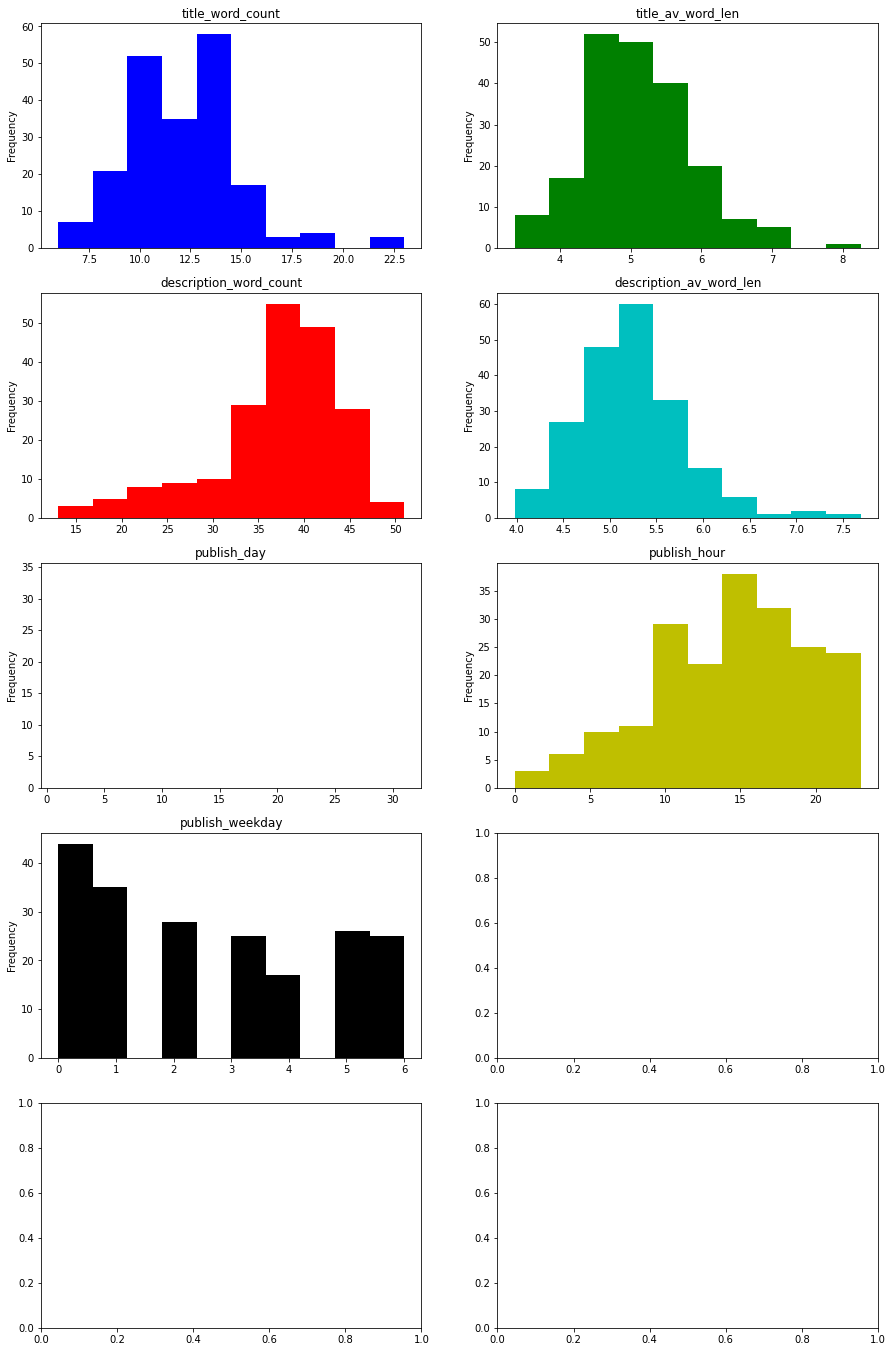

In [77]:
fig, ax = plt.subplots(nrows = ((numeric_df.shape[1] + 2) // 2), ncols = 2, figsize = (15, 3*numeric_df.shape[1]))
colors = 'bgrcwyk'

for idx, col in enumerate(numeric_df.columns):
    x, y = idx//2, idx % 2
    numeric_df[col].plot(ax = ax[x,y], kind = 'hist', legend = False, color = colors[idx], title=col)

plt.show()

#### Correlations

In [80]:
corr

NameError: name 'corr' is not defined

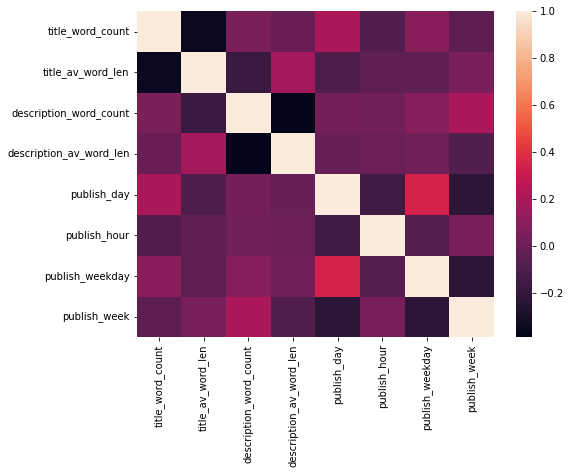

In [81]:
corr = data_out[numerical_vars].corr()

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax = ax)

plt.show()

#### Object Vars

In [83]:
object_df = data_out[object_vars].copy(deep=True)

#### Distrbutions

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

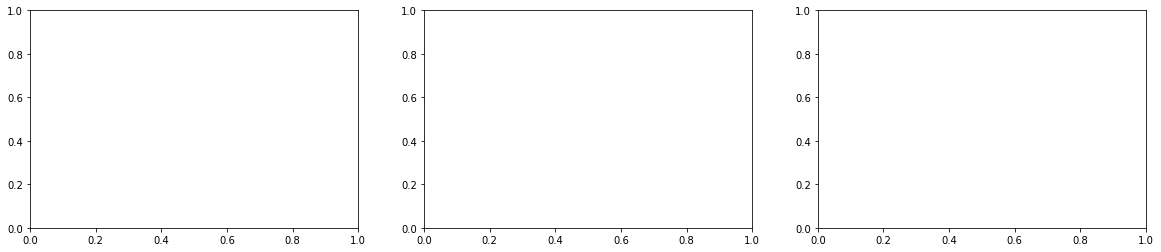

In [84]:
fig, ax = plt.subplots(nrows = ((object_df.shape[1] + 3) // 3), ncols = 3, figsize = (20, 2*object_df.shape[1]))
colors = 'bgrcmwk' * ((object_df.shape[1] // 7) + 1)

for idx, col in enumerate(object_df.columns):
    x, y = idx//3, idx % 3
    object_df[col].value_counts().plot(ax = ax[x, y], kind = 'bar', legend = False, color = colors[idx], rot = 50, fontsize=15)

plt.tight_layout()

#### Analysis Over time

In [58]:
print(f'Min Date: {data.publishedAt_dt.min()}')
print(f'Max Date: {data.publishedAt_dt.max()}')

Min Date: 2021-10-22 15:52:21+00:00
Max Date: 2021-11-22 20:38:04+00:00


## Step 5: Summarise and write a conclusion using markdown cells